In [87]:
import pdfplumber 
import fitz 
import os 
import re 
import json 
import pandas as pd
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
import nlp
from wordcloud import WordCloud
from collections import Counter
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\20100\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20100\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
pdf_dir = 'PDF files/'
pdf_files = [f for f in os.listdir(pdf_dir) if f.endswith('.pdf')]

In [73]:
def extract_text (pdf_path ):
    text = ''
    doc = fitz.open(pdf_path)
    for page in doc:
        text += page.get_text("text") + "\n"
    return text.strip()

def preprocess_text(text):
    text = re.sub(r'\s+',' ',text)
    text = re.sub(r'[^a-zA-Z0-9.?! ]', '', text)
    return text.lower().strip()

def tokenize_text(text):
    return [s.strip() for s in sent_tokenize(text) if s.strip()]

def removing_stopwords(sentences):
    stop_words = set(stopwords.words('english'))
    filtered_sentences = []

    for sentence in sentences:
        words = word_tokenize(sentence)  
        filtered_words = [word for word in words if word.lower() not in stop_words]  
        filtered_sentences.append(' '.join(filtered_words))  

    return filtered_sentences

In [74]:
print('\n📂 Available PDFs:')
for i, pdf in enumerate(pdf_files,1):
    print(f'{i} : {pdf}')
choice = int(input("\nEnter the number of the PDF you want to extract text from: ")) - 1
if 0 <= choice < len(pdf_files):
    PDF_FILE = pdf_files[choice]
    PDF_PATH = os.path.join(pdf_dir, PDF_FILE)
    print(f"\n✅ Extracting text from: {PDF_FILE}")
    text = extract_text(PDF_PATH)
    print(f'\n {text}')



📂 Available PDFs:
1 : 05. A Short History of Egypt – to About 1970 author Aerospace Computing Lab.pdf
2 : ArtOfWar.pdf
3 : oldmansea.pdf
4 : Process Control Instrumentation Technology 8th Ed.pdf.pdf
5 : Python for Data Analysis_ Data Wrangling with Pandas, NumPy, and IPython ( PDFDrive ).pdf

✅ Extracting text from: ArtOfWar.pdf

 THE ART OF WAR
By Sun Tzu
Translated with introduction and notes by
Lionel Giles, M.A.
19th May 2004

Contents
1
INTRODUCTION
4
1.1
Sun Wu and his Book . . . . . . . . . . . . . . . . . . . . . . . . . .
4
1.2
The Text of Sun Tzu
. . . . . . . . . . . . . . . . . . . . . . . . . .
14
1.3
The Commentators . . . . . . . . . . . . . . . . . . . . . . . . . . .
16
1.4
Appreciations of Sun Tzu . . . . . . . . . . . . . . . . . . . . . . . .
20
1.5
Apologies for War . . . . . . . . . . . . . . . . . . . . . . . . . . . .
21
2
LAYING PLANS
28
3
WAGING WAR
32
4
ATTACK BY STRATAGEM
36
5
TACTICAL DISPOSITIONS
42
6
ENERGY
46
7
WEAK POINTS AND STRONG
52
8
MANEUVERING
59

In [75]:
clean_text = preprocess_text(text)
tokenized_text = tokenize_text(clean_text)
filtered_text = ' '.join(removing_stopwords(tokenized_text))


In [76]:
words = word_tokenize(filtered_text)

total_words = len(words)
unique_words = len(set(words))
total_sent = len(tokenized_text)
print("\n📊 Basic Text Statistics:")
print(f"🔹 Total Words: {total_words}")
print(f"🔹 Unique Words: {unique_words}")
print(f"🔹 Total Sentences: {total_sent}")


📊 Basic Text Statistics:
🔹 Total Words: 31997
🔹 Unique Words: 7183
🔹 Total Sentences: 2759


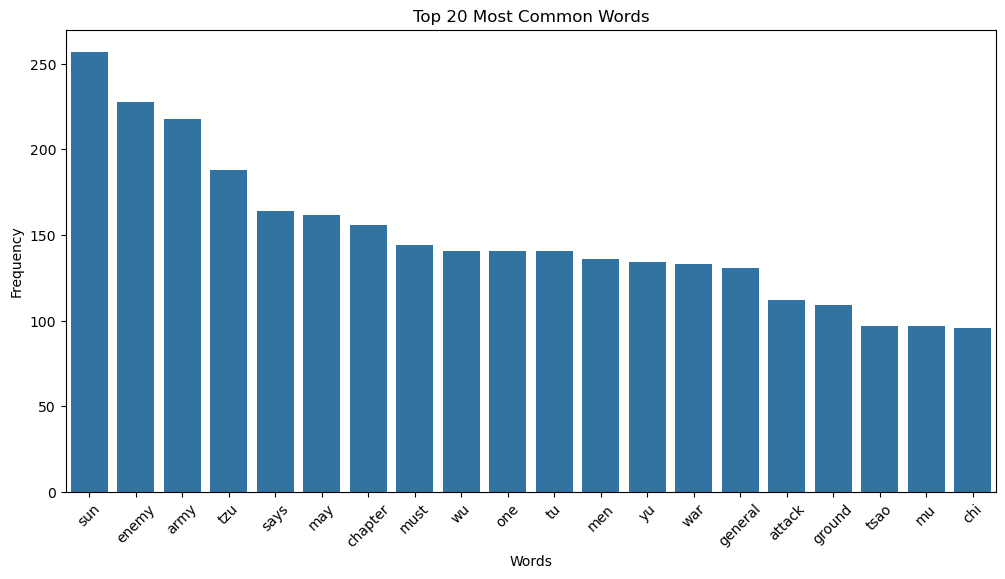

In [77]:
words = [word.lower() for word in words if word.isalnum()]  
words_count = Counter(words)
most_common_words = words_count.most_common(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=[word for word, _ in most_common_words], y=[count for _, count in most_common_words])
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words")
plt.show()

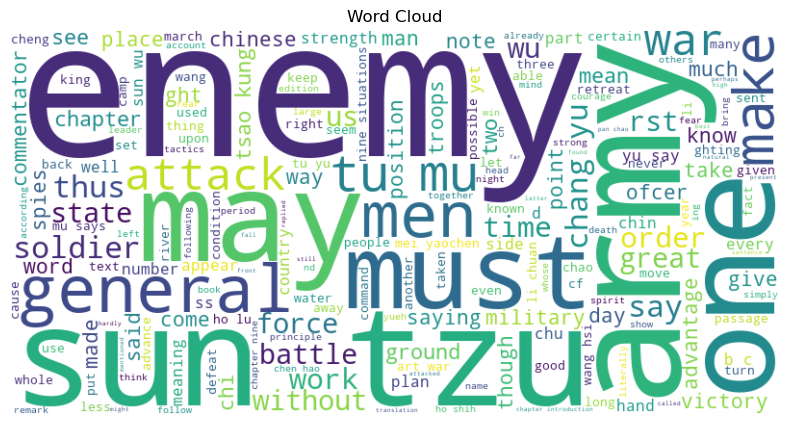

In [78]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(filtered_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud")
plt.show()

In [95]:
def save_to_json(data,filename):
    if not os.path.exists('Extracted text'):
        os.makedirs('Extracted text')
    
    file_path = os.path.join('Extracted text', filename)  
    with open(file_path, "w", encoding="utf-8") as file:
        json.dump(data, file, ensure_ascii=False, indent=4)
    
    print(f"✅ Filtered text saved as {file_path}")

In [96]:
save_to_json(filtered_text, 'Art of War')

✅ Filtered text saved as Extracted text\Art of War
